# Turnover de Funcionários

A rotatividade de funcionários de empresas é um problema que implica em gastos com treinamento, tempo de especialização de funcionários e outros. Para identificar se uma determinada empresa sofre com alta rotatividade de seus colaboradores, iremos analisar a base de dados do RH com informações de 1470 funcionários.

# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Análise Exploratória


In [2]:
df = pd.read_excel('base_rh.xlsx')
df.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,...,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,...,Sim,11,0,8,0,Ruim,6,4,0,5
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,...,Não,23,1,10,3,Muito bom,10,7,1,7
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,...,Sim,15,0,7,3,Muito bom,0,0,0,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,...,Sim,11,0,8,3,Muito bom,8,7,3,0
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,...,Não,12,1,6,3,Muito bom,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            1470 non-null   int64 
 1   Funcionário_deixou_a_empresa  1470 non-null   object
 2   Idade                         1470 non-null   int64 
 3   Frequência de Viagens         1470 non-null   object
 4   Distância_do_trabalho         1470 non-null   int64 
 5   Formação                      1470 non-null   object
 6   E-Sat                         1470 non-null   object
 7   Gênero                        1470 non-null   object
 8   Estado_Civil                  1470 non-null   object
 9   Salário                       1470 non-null   int64 
 10  Qte_Empresas_Trabalhadas      1470 non-null   int64 
 11  Faz_hora_extras?              1470 non-null   object
 12  Perc_de_aumento               1470 non-null   int64 
 13  Qte_ações_da_empre

In [4]:
# Seleciona apenas colunas não numéricas (objetos e categorias)
qualitativas = df.select_dtypes(include=['object', 'category']).columns
qualitativas

Index(['Funcionário_deixou_a_empresa', 'Frequência de Viagens', 'Formação',
       'E-Sat', 'Gênero', 'Estado_Civil', 'Faz_hora_extras?',
       'Equilibrio_de_Vida'],
      dtype='object')

In [5]:
def tab_freq(col):
  tab_freq = df[col].value_counts().reset_index()
  tab_freq.columns = [col, 'Freq Absoluta']

  # Freq. Relativa
  tab_freq['Freq relativa'] = ((tab_freq['Freq Absoluta'] / tab_freq['Freq Absoluta'].sum()) * 100).round(2)

  # Freq. Acumulada
  tab_freq['Freq acumulada'] = tab_freq['Freq Absoluta'].cumsum()

  # Freq. Relativa Acumulada
  tab_freq['% Acumulado'] = tab_freq['Freq relativa'].cumsum().round(2)

  return tab_freq

In [6]:
for col in qualitativas:
  # print(f"\nFrequência para coluna: {col}")
  display(tab_freq(col))
  print()

,Funcionário_deixou_a_empresa,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,Não,1233,83.88,1233,83.88
1,Sim,237,16.12,1470,100.00


,Frequência de Viagens,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,Viaja raramente,1043,70.95,1043,70.95
1,Viaja frequentemente,277,18.84,1320,89.79
2,Não viaja,150,10.20,1470,99.99


,Formação,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,Ensino Superior,572,38.91,572,38.91
1,Mestrado,398,27.07,970,65.98
2,Ensino Técnico,282,19.18,1252,85.16
3,Ensino Médio,170,11.56,1422,96.72
4,Doutorado,48,3.27,1470,99.99


,E-Sat,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,Alto,453,30.82,453,30.82
1,Muito Alto,446,30.34,899,61.16
2,Médio,287,19.52,1186,80.68
3,Baixo,284,19.32,1470,100.00


,Gênero,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,H,882,60.0,882,60.0
1,M,588,40.0,1470,100.0


,Estado_Civil,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,Casado,673,45.78,673,45.78
1,Solteiro,470,31.97,1143,77.75
2,Divorciado,327,22.24,1470,99.99


,Faz_hora_extras?,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,Não,1054,71.7,1054,71.7
1,Sim,416,28.3,1470,100.0


,Equilibrio_de_Vida,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,Muito bom,893,60.75,893,60.75
1,Bom,344,23.40,1237,84.15
2,Excelente,153,10.41,1390,94.56
3,Ruim,80,5.44,1470,100.00


In [7]:
# Seleciona apenas colunas numéricas
numericas = df.select_dtypes(include=['number']).drop(columns=['ID']).columns
numericas

Index(['Idade', 'Distância_do_trabalho', 'Salário', 'Qte_Empresas_Trabalhadas',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo',
       'Anos_desde_a_ultima_promocao', 'Anos_com_o_mesmo_chefe'],
      dtype='object')

In [8]:
def boxplot_hist(col):
  sns.set_theme(style="whitegrid")
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  sns.boxplot(data=df, y=col, ax=axs[0])
  # axs[0].set_title(f'Boxplot - {col}')

  sns.histplot(data=df, x=col, ax=axs[1])
  # axs[1].set_title(f'Histograma - {col}')

  plt.suptitle(f'Boxplot e Histograma - {col}')
  plt.tight_layout()
  plt.show()


count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Idade, dtype: float64


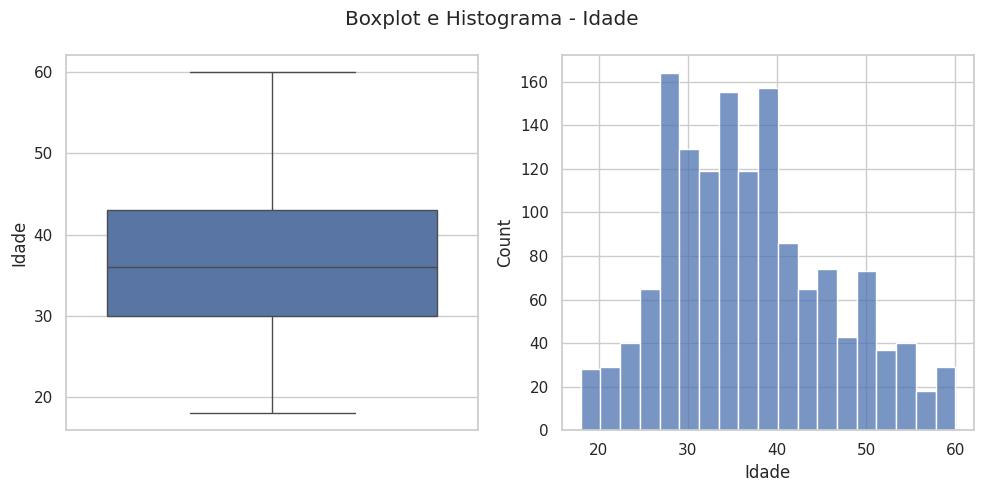


count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: Distância_do_trabalho, dtype: float64


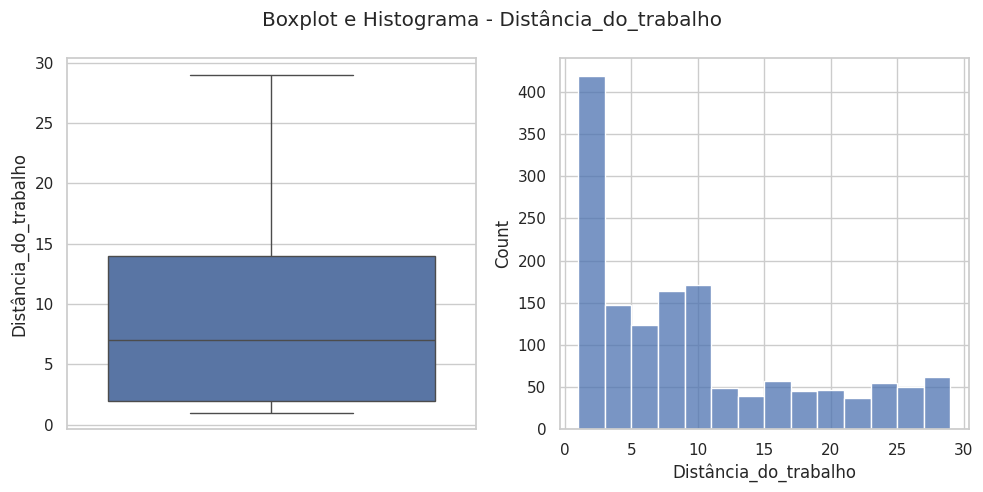


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: Salário, dtype: float64


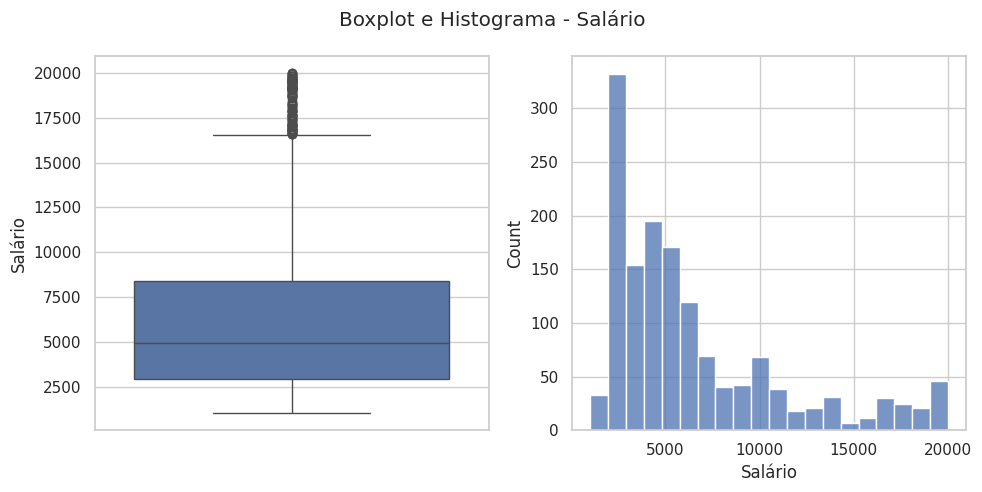


count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Qte_Empresas_Trabalhadas, dtype: float64


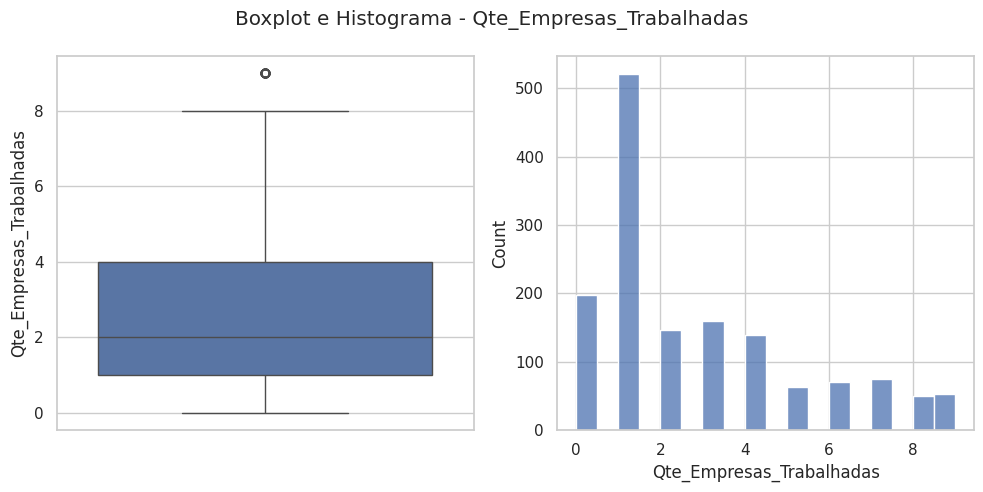


count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: Perc_de_aumento, dtype: float64


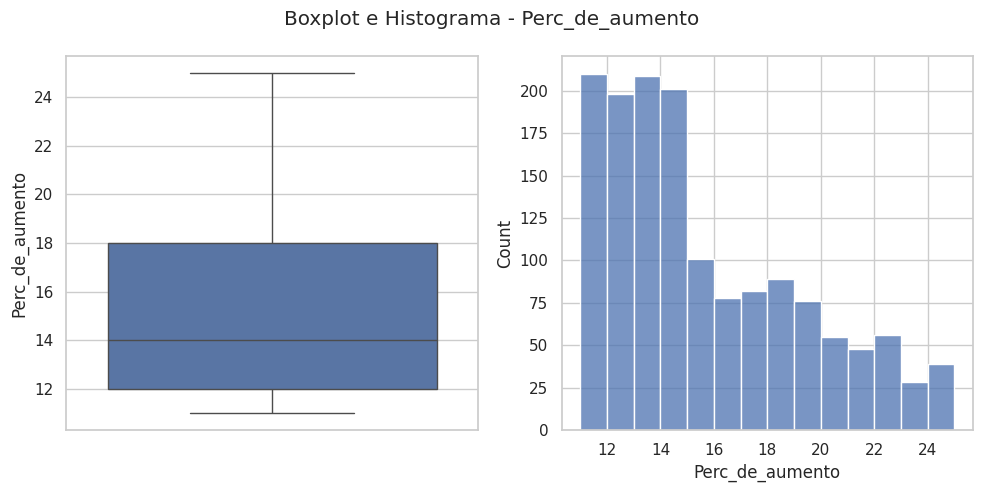


count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Qte_ações_da_empresa, dtype: float64


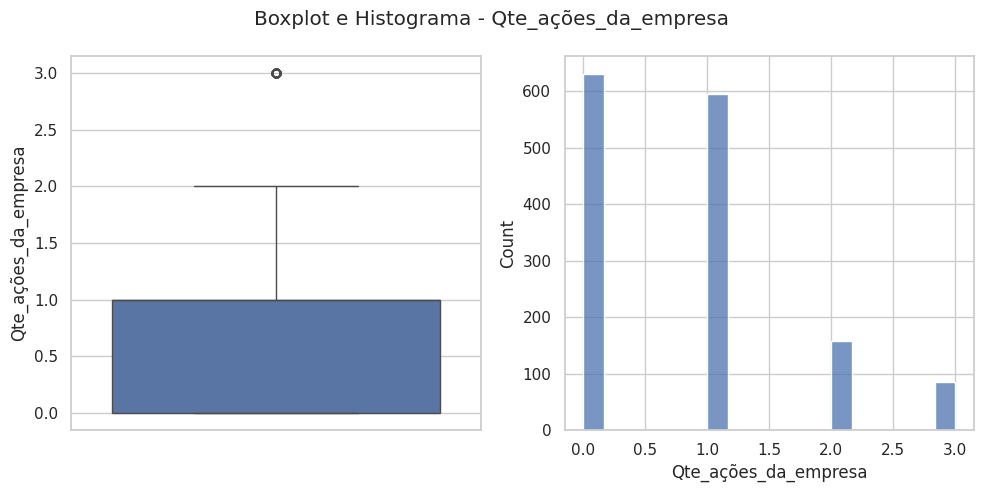


count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: Tempo_de_carreira, dtype: float64


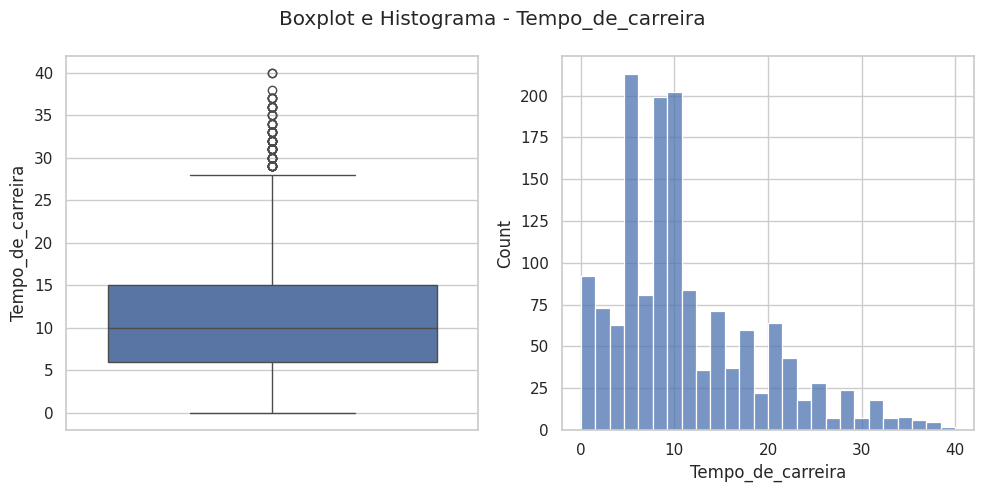


count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: Horas_de_treinamento, dtype: float64


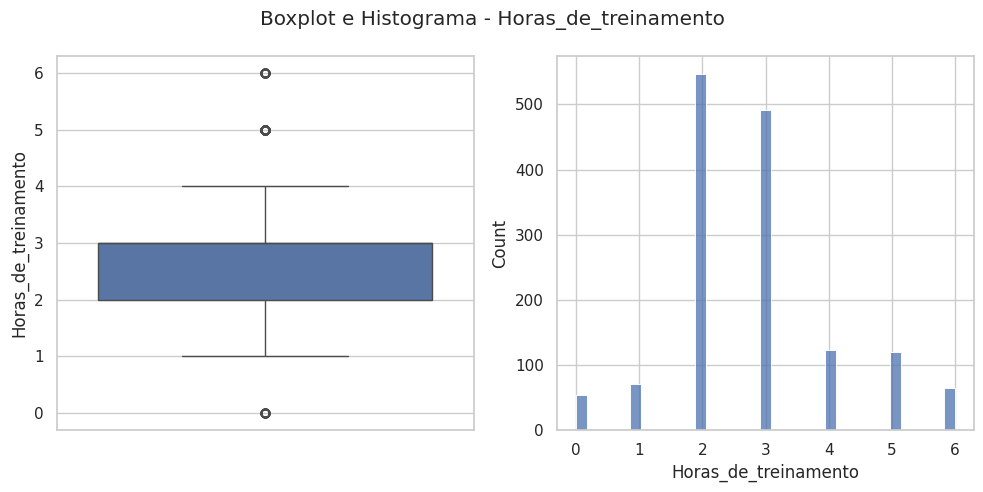


count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: Tempo_de_empresa, dtype: float64


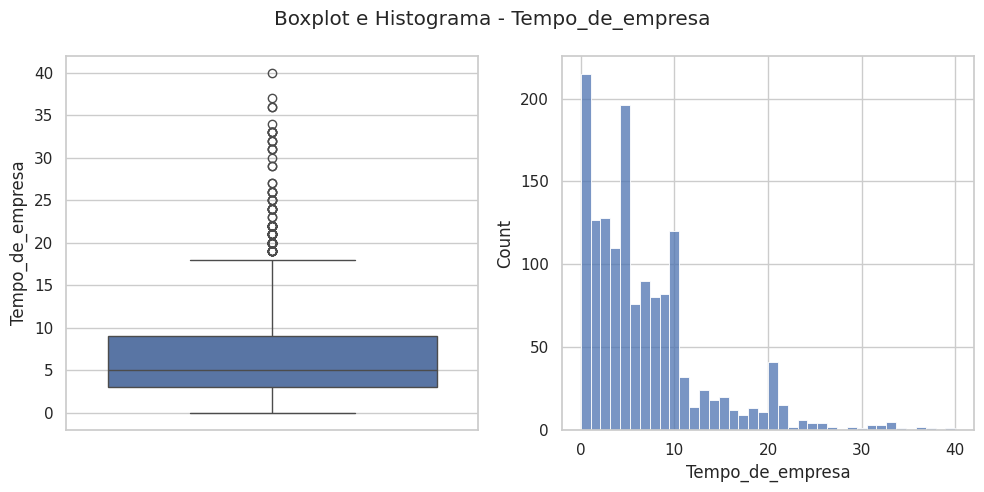


count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: Anos_no_mesmo_cargo, dtype: float64


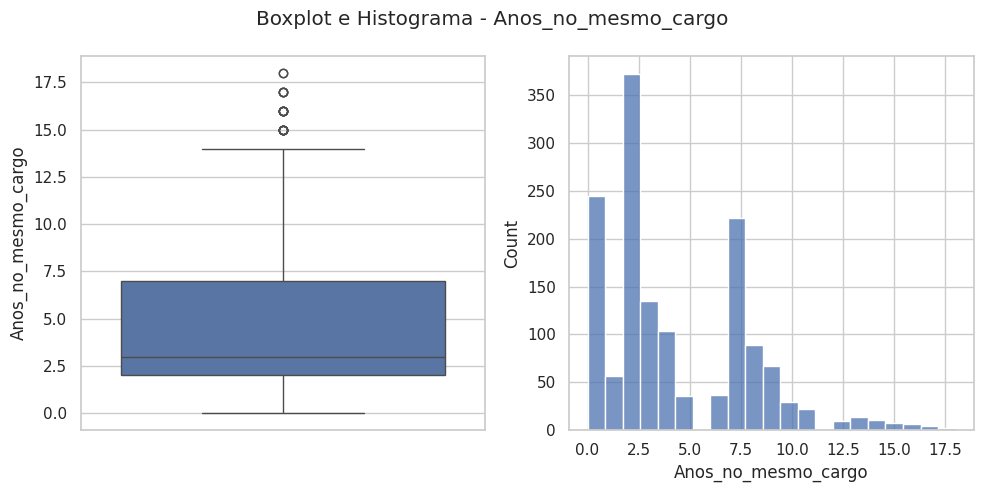


count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: Anos_desde_a_ultima_promocao, dtype: float64


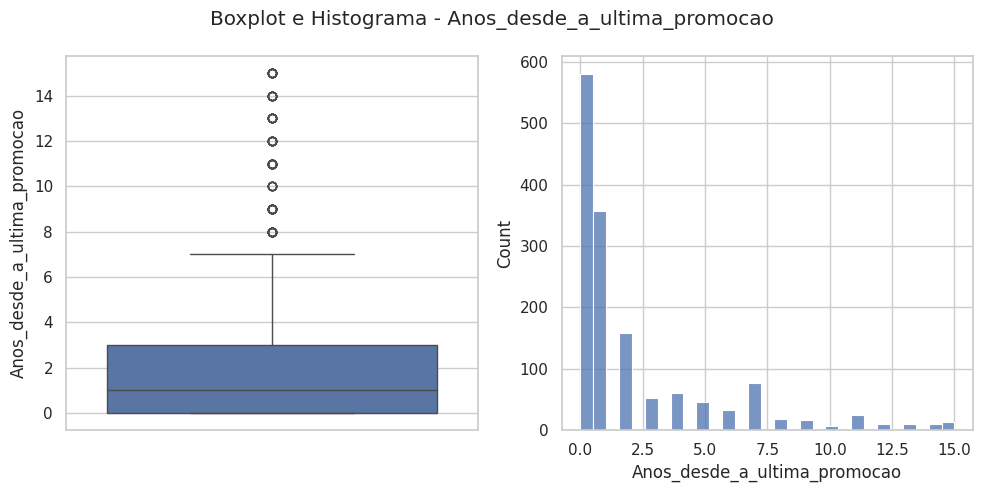


count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: Anos_com_o_mesmo_chefe, dtype: float64


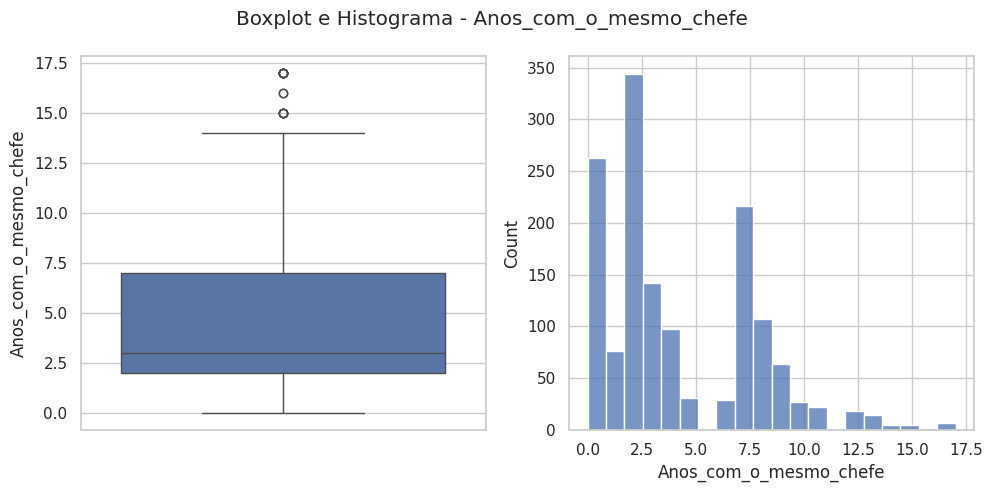

In [9]:
for col in numericas:
  print(df[col].describe())
  boxplot_hist(col)

  print()

# Análise de Associação e Solução do Problema

## Information Value (IV)

In [10]:
qualitativas

Index(['Funcionário_deixou_a_empresa', 'Frequência de Viagens', 'Formação',
       'E-Sat', 'Gênero', 'Estado_Civil', 'Faz_hora_extras?',
       'Equilibrio_de_Vida'],
      dtype='object')

In [11]:
def iv(x, y):
  df_iv = pd.crosstab(x, y, normalize='columns')
  df_iv['ln(Odds)'] = np.log((df_iv['Sim'] + 1e-10) / (df_iv['Não'] + 1e-10))
  df_iv['IV'] = (df_iv['Sim'] - df_iv['Não']) * df_iv['ln(Odds)']

  return df_iv, df_iv['IV'].sum()


In [12]:
for col in qualitativas.difference(['Funcionário_deixou_a_empresa']):
  df_iv, iv_total = iv(df[col], df['Funcionário_deixou_a_empresa'])
  print(f'\nIV total: {iv_total:.4f}')
  display(df_iv)
  print()


IV total: 0.0999


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
E-Sat,,,,
Alto,0.317113,0.261603,-0.192428,0.010682
Baixo,0.171938,0.303797,0.569225,0.075058
Muito Alto,0.313058,0.253165,-0.212347,0.012718
Médio,0.197891,0.181435,-0.086823,0.001429




IV total: 0.0670


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Equilibrio_de_Vida,,,,
Bom,0.231955,0.244726,0.053597,0.000684
Excelente,0.102190,0.113924,0.108700,0.001276
Muito bom,0.621249,0.535865,-0.147850,0.012624
Ruim,0.044607,0.105485,0.860688,0.052397




IV total: 0.2189


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Estado_Civil,,,,
Casado,0.477697,0.354430,-0.298464,0.036791
Divorciado,0.238443,0.139241,-0.537927,0.053364
Solteiro,0.283861,0.506329,0.578704,0.128743




IV total: 0.4002


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Faz_hora_extras?,,,,
Não,0.765612,0.464135,-0.500500,0.150890
Sim,0.234388,0.535865,0.826906,0.249293




IV total: 0.0165


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Formação,,,,
Doutorado,0.034874,0.021097,-0.502617,0.006925
Ensino Médio,0.112733,0.130802,0.148659,0.002686
Ensino Superior,0.383617,0.417722,0.085170,0.002905
Ensino Técnico,0.193025,0.185654,-0.038936,0.000287
Mestrado,0.275750,0.244726,-0.119357,0.003703




IV total: 0.1209


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Frequência de Viagens,,,,
Não viaja,0.111922,0.050633,-0.793202,0.048615
Viaja frequentemente,0.168694,0.291139,0.545714,0.066820
Viaja raramente,0.719384,0.658228,-0.088844,0.005433




IV total: 0.0065


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Gênero,,,,
H,0.593674,0.632911,0.064000,0.002511
M,0.406326,0.367089,-0.101553,0.003985


## Segmentação (Idade, Salário)

In [13]:
bins = [18, 25, 30, 36, 43, np.inf]
faixas = ['18 a 25 anos', '26 a 30 anos', '31 a 36 anos', '37 a 43 anos', 'acima de 43 anos']
df['Faixa_Etária'] = pd.cut(df['Idade'], bins=bins, labels=faixas, right=True)

In [14]:
df[['Idade', 'Faixa_Etária']].head()

,Idade,Faixa_Etária
0,41,37 a 43 anos
1,49,acima de 43 anos
2,37,37 a 43 anos
3,33,31 a 36 anos
4,27,26 a 30 anos


In [15]:
freq_faixa_etaria = tab_freq('Faixa_Etária')
freq_faixa_etaria

,Faixa_Etária,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,31 a 36 anos,412,28.18,412,28.18
1,acima de 43 anos,347,23.73,759,51.91
2,37 a 43 anos,325,22.23,1084,74.14
3,26 a 30 anos,263,17.99,1347,92.13
4,18 a 25 anos,115,7.87,1462,100.00


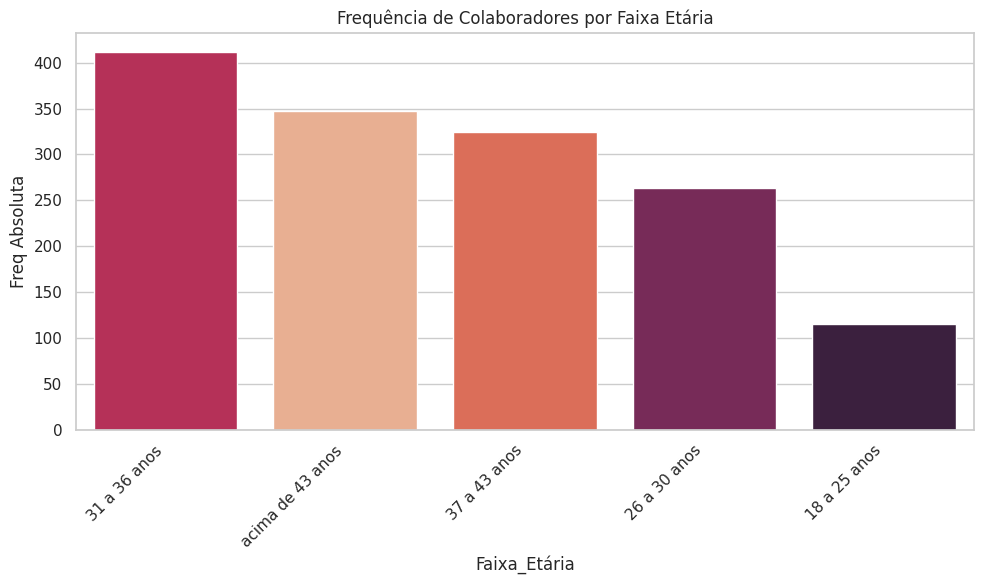

In [16]:
freq_faixa_etaria = freq_faixa_etaria.sort_values(by='Freq Absoluta', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(data=freq_faixa_etaria,
            x='Faixa_Etária',
            y='Freq Absoluta',
            hue='Faixa_Etária',
            palette='rocket',
            order=freq_faixa_etaria['Faixa_Etária'])

plt.xticks(rotation=45, ha='right')
plt.title('Frequência de Colaboradores por Faixa Etária')
plt.tight_layout()
plt.show()

In [17]:
df_iv, iv_total = iv(df['Faixa_Etária'], df['Funcionário_deixou_a_empresa'])
print(f'\nIV total: {iv_total:.4f}')
display(df_iv)


IV total: 0.2386


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Faixa_Etária,,,,
18 a 25 anos,0.061025,0.171674,1.034309,0.114445
26 a 30 anos,0.168430,0.240343,0.355551,0.025569
31 a 36 anos,0.281530,0.283262,0.006134,0.000011
37 a 43 anos,0.240846,0.124464,-0.660146,0.076830
acima de 43 anos,0.248169,0.180258,-0.319725,0.021713


In [18]:
# Criar pontos de corte automáticos
salarios = df['Salário']
pontos_corte = np.linspace(salarios.min(), salarios.max(), 7)  # 7 pontos = 6 faixas

# Usar nos labels
df['Faixa_Salarial'] = pd.cut(df['Salário'],
                                   bins=pontos_corte,
                                   labels=[f'R$ {int(pontos_corte[i]//1000)}K-{int(pontos_corte[i+1]//1000)}K'
                                          for i in range(len(pontos_corte)-1)])

In [20]:
freq_faixa_salarial = tab_freq('Faixa_Salarial')
freq_faixa_salarial

,Faixa_Salarial,Freq Absoluta,Freq relativa,Freq acumulada,% Acumulado
0,R$ 1K-4K,576,39.21,576,39.21
1,R$ 4K-7K,471,32.06,1047,71.27
2,R$ 7K-10K,175,11.91,1222,83.18
3,R$ 16K-19K,103,7.01,1325,90.19
4,R$ 10K-13K,92,6.26,1417,96.45
5,R$ 13K-16K,52,3.54,1469,99.99


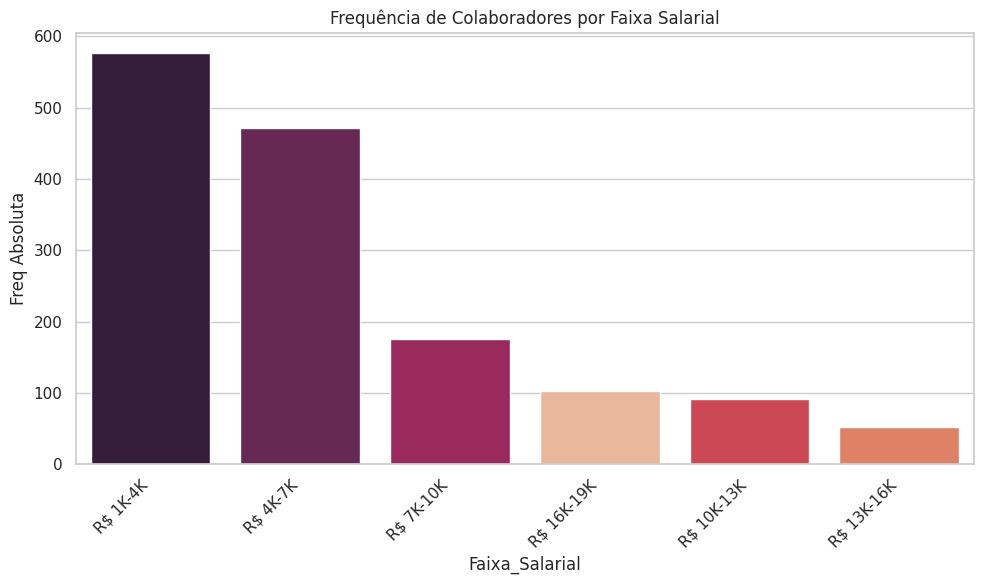

In [21]:
freq_faixa_salarial = freq_faixa_salarial.sort_values(by='Freq Absoluta', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(data=freq_faixa_salarial,
            x='Faixa_Salarial',
            y='Freq Absoluta',
            hue='Faixa_Salarial',
            palette='rocket',
            order=freq_faixa_salarial['Faixa_Salarial'])

plt.xticks(rotation=45, ha='right')
plt.title('Frequência de Colaboradores por Faixa Salarial')
plt.tight_layout()
plt.show()

In [22]:
df_iv, iv_total = iv(df['Faixa_Salarial'], df['Funcionário_deixou_a_empresa'])
print(f'\nIV total: {iv_total:.4f}')
display(df_iv)


IV total: 0.3228


Funcionário_deixou_a_empresa,Não,Sim,ln(Odds),IV
Faixa_Salarial,,,,
R$ 1K-4K,0.354420,0.588983,0.507914,0.119138
R$ 4K-7K,0.339822,0.220339,-0.433254,0.051766
R$ 7K-10K,0.117599,0.127119,0.077837,0.000741
R$ 10K-13K,0.068127,0.033898,-0.698002,0.023891
R$ 13K-16K,0.040552,0.008475,-1.565502,0.050216
R$ 16K-19K,0.079481,0.021186,-1.322156,0.077074



# Análise de Turnover e Propostas Estratégicas

Durante esta análise, identificamos que aproximadamente 16,12% dos colaboradores se desligaram da empresa. Utilizamos o *Information Value (IV)* para entender a relação entre o turnover e diversas variáveis disponíveis, o que nos permitiu identificar padrões relevantes.

## Principais Indicadores Associados ao Turnover

**Horas Extras (IV = 0,40)**: Esse IV é considerado alto, indicando forte relação com o desligamento. Aproximadamente 53% dos colaboradores que realizaram horas extras deixaram a empresa, o que sugere sobrecarga de trabalho, impacto na qualidade de vida ou insatisfação com a jornada.

**Faixa Salarial (IV = 0,32)**: Também um indicador com forte correlação. Cerca de 39,21% dos funcionários recebem até R$ 4.000,00, e entre os que se desligaram, 58% pertencem a essa faixa salarial. Isso revela que a remuneração pode ser um fator relevante na decisão de saída.

## Recomendações para Redução de Turnover

- Acompanhar a jornada de trabalho para promover a saúde dos colaboradores

- Oferecer salários competitivos e benefícios, aumentando a atratividade e retenção dos profissionais

- Implementar programas de bem-estar físico e emocional, fortalecendo a qualidade de vida no ambiente corporativo

- Estimular o equilíbrio entre vida profissional e pessoal, promovendo uma cultura de respeito às folgas e férias

- Investir no desenvolvimento e engajamento dos funcionários, por meio de treinamentos, mentorias e planos de carreira que reforcem o sentimento de valorização